<Figure size 800x800 with 0 Axes>

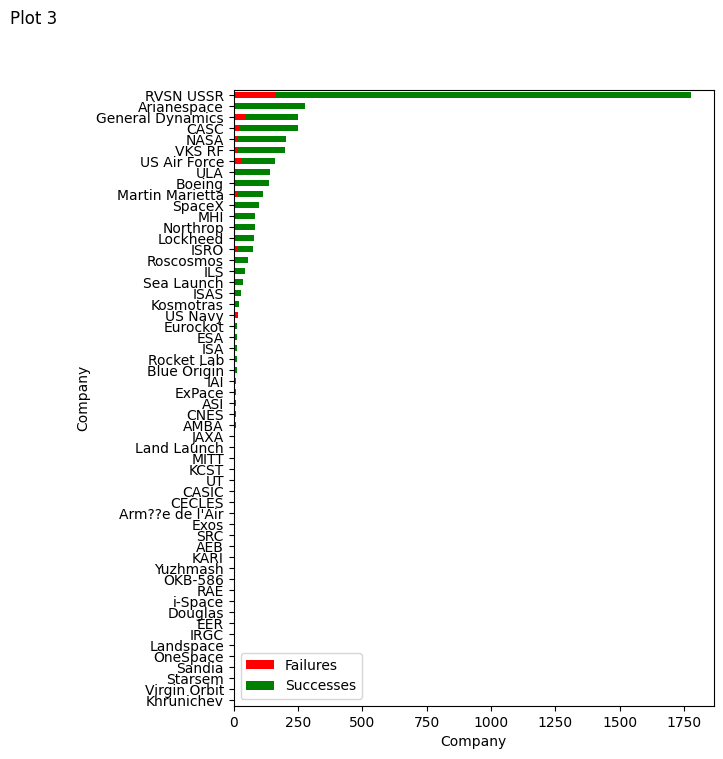

In [2]:
"""
Script to analyze data about space missions since 1957 including:
1. Create a pie plot that shows the distribution of mission outcomes.

2. Create a horizontal bar plot showing the total number of missions for each company, with the most at the top and the fewest at the bottom.

3. Create the same horizontal bar plot, but with the missions grouped into success and failure, with success in green and failure in red. 
"""

# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read csv data
missions_df = pd.read_csv("data.csv")

# Plot Function for Q1: Create a pie plot that shows the distribution of mission outcomes.
def pie_plot_mission_outcomes():
    """
    Function to create a pie plot that shows the distribution of mission outcomes.
    """
    # Create a series that summarizes the number of missions by Outcome
    outcomes = missions_df.groupby('Outcome').size().sort_values(ascending=False)
    
    # Plot missions by outcome as a pie plot
    outcomes.plot(kind='pie', ylabel = "Outcome")
    
    # Need to shift this plot left slightly and use a suptitle to display as per example
    plt.subplots_adjust(left=0.1)
    plt.suptitle("Plot 1", fontsize=12, x=0.05) # Set the parent title for the entire figure and move it to the left

    #plt.tight_layout()
    plt.savefig('mission_pie_plot.png') # Save figure
    plt.clf() # Clear the current figure 

# Plot Function for Q2: horizontal bar plot showing the total number of missions for each company
def bar_plot_mission_numbers():
    """
    Function to create a horizontal bar plot that showing the total number of missions for each company, 
    with the most at the top and the fewest at the bottom.
    """
    
    # Generate the series of number of missions run by company to plot
    num_missions = missions_df.groupby('Company').size().sort_values()
    
    # Generate horizontal bar plot of number of misions by company
    num_missions.plot(kind='barh', figsize = [8,8], xlabel = 'Company')

    # Need to shift this plot left slightly and use a suptitle to display as per example
    plt.subplots_adjust(left=0.3)
    plt.suptitle("Plot 2", fontsize=12, x=0.05) #Set the parent title
    
    plt.savefig('mission_bar_plot.png') # Save figure 
    plt.clf() # Clear the current figure 

# Function to summarize dataset for easier graphing of successful missions and failures
def build_success_df():
    """
    Function to summarize the number of successful missions and failures by company and return a 
    df containing that summary
    """
    # Create a series for successes, failures and total number of missions grouped by Company
    successes = missions_df[missions_df['Outcome']=='Success'].groupby(['Company']).size().sort_values()
    failures = missions_df[missions_df['Outcome']!='Success'].groupby(['Company']).size().sort_values()
    missions = missions_df.groupby(['Company']).size().sort_values()
    
    # Add names to each series which then translates into column names when building subsequent df
    successes.name, failures.name, missions.name = 'Successes', 'Failures', 'Missions'
    
    # Combine all three series into a single dataframe for easier reference and plotting
    successes_df = pd.DataFrame(data = [missions, failures, successes]).T.fillna(0).sort_values('Missions')
    
    return successes_df    
    
# Plot Function for Q3: horizontal bar plot showing the total number of missions for each company
# color coded for success and failure
def bar_plot_missions_color_coded():
    
    """
    Function to create a horizontal bar plot that showing the total number of missions for each company, 
    with the most at the top and the fewest at the bottom.
    Have the missions grouped into success and failure, with success in green and failure in red. 
    """
    
    # Run function to create dataframe for plotting
    # The df returned summarizes the number of successful missions and failures by company
    successes_df = build_success_df()
    
    # Plot missions results on a color coded horizontal bar chart
    successes_df[['Failures', 'Successes']].plot(
        kind='barh', color = ['red', 'green'], figsize = [8,8], xlabel = 'Company', stacked= True)

    # Need to shift this plot left slightly and use a suptitle to display as per example
    plt.subplots_adjust(left=0.3)
    plt.suptitle("Plot 3", fontsize=12, x=0.05) # Add title and specify position
    
    plt.savefig('mission_bar_plot_color_coded.png')  # Save figure 

## Run Functions to Generate Plots ##

# 1. Run function to generate pie plot of the mission outcomes  
pie_plot_mission_outcomes()

# 2. Run function to generate bar plot of missions run by company   
bar_plot_mission_numbers()

# 3. Run function to generate bar plot of missions run by company differentiating between successes and failures
bar_plot_missions_color_coded()
